<a href="https://colab.research.google.com/github/BjornKSHoffman/Fintech/blob/master/Live%20Reddit%20wallstreetbets%20Sentiment%20Scores%20for%20NASDAQ%20Ticker%20Symbols%20and%20Deep%20Learning%20Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Title
print("Project 2: Machine Learning")

Project 2: Machine Learning


In [ ]:
#Colab Installations
!pip install praw

     |████████████████████████████████| 153kB 6.0MB/s 
     |████████████████████████████████| 204kB 29.4MB/s 


In [ ]:
# Importing libraries
import praw
import pandas as pd
from praw.models import MoreComments
import datetime

In [ ]:
### BEGINNING OF PSEUDOCODE
# Upload a daily scrape of the WSB subreddit (for day 1 - NOV 26) using Reddit API

In [ ]:
#Name "today" variable
today = datetime.date.today()
print(today)

2020-12-11


In [ ]:

# Authenticating Reddit account
reddit = praw.Reddit(client_id='ynA1ypO4kMVwRA', client_secret='dtFwv4-mgMDeI9uPm0GPieCRaFn8Dw', user_agent='Reddit_NLP')

In [ ]:
subreddit_entry = input('Please enter a subreddit :')

Please enter a subreddit :wallstreetbets


In [ ]:
# Pulling hot posts
hot_posts = reddit.subreddit(subreddit_entry).hot(limit=600)
for post in hot_posts:
    print(post.title, post.url)

In [ ]:
# Extracting all features of subreddit posts
posts = []
subreddit = reddit.subreddit(subreddit_entry)
for post in subreddit.hot(limit=600):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body'])
#posts = posts.sort_values('score', ascending=False).set_index('id')

In [ ]:
posts.to_csv(f'/content/wallstreetbets_hots_df_{today}.csv')

In [ ]:
##### Clean the data - this will be done with "nested for loop" - step 2 Separate into comments and add to a dataframe
reddit_comments = pd.read_csv(f'/content/wallstreetbets_hots_df_{today}.csv')
#
reddit_comments.head(20)

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body
0,0,"Daily Discussion Thread for December 11, 2020",39,kb0pf8,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,1708,Your daily trading discussion thread. Please k...
1,1,AirBnB NASDAQ Debut,24695,kat8vk,wallstreetbets,https://i.redd.it/awa79370ug461.jpg,654,NaN
2,2,My Dad found out I was trading options and gav...,19620,kapp57,wallstreetbets,https://i.redd.it/w82oykigwf461.jpg,542,NaN
3,3,How Call Options Work in 60 Seconds ft. Micros...,2492,katr37,wallstreetbets,https://v.redd.it/n5jxqzxzyg461,130,NaN
4,4,"WELCOME TO WALLSTREETBETS, SOLDIERS!",34842,kafm7t,wallstreetbets,https://v.redd.it/0fhhwxoh7d461,818,NaN
5,5,Careful when trading ABNB,2656,kanik9,wallstreetbets,https://i.redd.it/n1o28gjt6f461.png,178,NaN
6,6,Make it make Sense $ABNB,597,kauoi3,wallstreetbets,https://i.redd.it/meq062tl8h461.jpg,139,NaN
7,7,"Account was at $12k last week, and I expect to...",5769,kahcek,wallstreetbets,https://i.redd.it/wzn87vdjpd461.jpg,1610,NaN
8,8,I wrote a script that tracks the day’s highest...,1047,kap7q3,wallstreetbets,https://i.redd.it/es5u922vqf461.jpg,158,NaN
9,9,"Havent worked since march, decided to trade ag...",609,kasg2n,wallstreetbets,https://v.redd.it/ln2s1cazlg461,137,NaN


In [ ]:
#Create a PANDAS dataframe of the ticker symbols we're looking for (or just all the ticker symbols)
NASDAQ_TICKERS = pd.read_csv('/content/NASQAQ tickers CSV.csv', engine='python', header=None).reset_index()
NASDAQ_TICKERS.columns = ["Nasdaq_Ticker", "Company_Name"]
NASDAQ_TICKERS.head(20
          )

,Nasdaq_Ticker,Company_Name
0,Symbol,None
1,AACG,Ata Creativity Global
2,AACQ,Artius Acquisition Inc Cl A
3,AACQU,Artius Acquisition Inc Unit
4,AACQW,Artius Acquisition Inc WT
5,AAL,American Airlines Gp
6,AAME,Atlantic Amer Cp
7,AAOI,Applied Optoelect
8,AAON,Aaon Inc
9,AAPL,Apple Inc


In [ ]:
#Get dataframe with both NASDAQ tickers and TEXT column from oracle text. Unrelated columns so use Ignore Index. Dont forget to drop before training model.
bjorn_test_df = pd.concat([reddit_comments, NASDAQ_TICKERS], axis=0, ignore_index=True)
bjorn_test_df

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,Nasdaq_Ticker,Company_Name
0,0.0,"Daily Discussion Thread for December 11, 2020",39.0,kb0pf8,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,1708.0,Your daily trading discussion thread. Please k...,NaN,NaN
1,1.0,AirBnB NASDAQ Debut,24695.0,kat8vk,wallstreetbets,https://i.redd.it/awa79370ug461.jpg,654.0,NaN,NaN,NaN
2,2.0,My Dad found out I was trading options and gav...,19620.0,kapp57,wallstreetbets,https://i.redd.it/w82oykigwf461.jpg,542.0,NaN,NaN,NaN
3,3.0,How Call Options Work in 60 Seconds ft. Micros...,2492.0,katr37,wallstreetbets,https://v.redd.it/n5jxqzxzyg461,130.0,NaN,NaN,NaN
4,4.0,"WELCOME TO WALLSTREETBETS, SOLDIERS!",34842.0,kafm7t,wallstreetbets,https://v.redd.it/0fhhwxoh7d461,818.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZSAN,Zosano Pharma
4327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZUMZ,Zumiez Inc
4328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZVO,Zovio Inc
4329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZYNE,Zynerba Pharma CS


In [ ]:
#define function to iterate through column of NASDAQ tickers, and look for instances of the items in column "text"
def check_subset(text,Nasdaq_Ticker):
  s = []
  for q in Nasdaq_Ticker:
    for r in text:
      if ((str(q) in str(r))) & (len(str(q))>3):
        s.append([q,r])


  return s  

In [ ]:
#check dytpes to verify success
bjorn_test_df.dtypes

Unnamed: 0       float64
title             object
score            float64
id                object
subreddit         object
url               object
num_comments     float64
body              object
Nasdaq_Ticker     object
Company_Name      object
dtype: object

In [ ]:
#Initiate function
ticker_name_find_in_comments = check_subset(bjorn_test_df['title'], bjorn_test_df['Nasdaq_Ticker'])
ticker_name_find_in_comments

[['AAPL',
  "The gift that keeps giving....not that one, I'm talking about AAPL"],
 ['ADBE',
  'Selling DoorDash after IPO? | AirBNB IPO NEXT | LULU, ADBE, COST, PLAY STOCK EARNINGS | STOCK MARKET NEWS [12-10]'],
 ['AMZN',
  'what the $AMZN MM’s don’t know is i have certified diamond hands 😈💎\U0001f932🏻 #GUH'],
 ['ARCT', '🚀ARCT🚀 is mini MRNA prepping for launch? ARK seems to think so 🌕🌕'],
 ['BCRX',
  "BCRX 22% Short squeeze, it's fucking real, loaded, and the margin calls are beginning today."],
 ['BILI',
  "12/11 SPY and TSLA POSSIBILITIES or STOP LOSING YOU'RE MONEY or I'M BACK FRIENDS and I MISSED YOU!"],
 ['BNTX',
  'Keep an eye on PFE and BNTX for big gains tomorrow if the approval goes through this evening🚀🚀🚀'],
 ['BOOM', 'THE GREAT WAR BETWEEN WSB AND TRADITIONAL INVESTOR BOOMERS'],
 ['CIIC', '$CIIC When to take profit?'],
 ['CIIC', 'Potential 180% gain. $CIICW is undervalued relative to $CIIC'],
 ['CIICW', 'Potential 180% gain. $CIICW is undervalued relative to $CIIC'],
 ['COM

In [ ]:
with open('extract_to_ibm.txt', 'w',encoding="utf8") as f:
    for item in ticker_name_find_in_comments:
        f.write("%s\n" % item)

In [ ]:
#change to pd dataframe
December_11_Extracted_df = pd.DataFrame(ticker_name_find_in_comments)
#Save as csv
December_11_Extracted_df.to_csv('December_10_Extracted_CSV', index=False)

In [ ]:
#Read saved CSV
December_11_Extracted_csv = pd.read_csv('December_10_Extracted_CSV', index_col=False)
December_11_Extracted_csv.columns = ["Ticker_Present_In_Text", "Hot_Post"]
December_11_Extracted_csv

,Ticker_Present_In_Text,Hot_Post
0,AAPL,"The gift that keeps giving....not that one, I'..."
1,ADBE,Selling DoorDash after IPO? | AirBNB IPO NEXT ...
2,AMZN,what the $AMZN MM’s don’t know is i have certi...
3,ARCT,🚀ARCT🚀 is mini MRNA prepping for launch? ARK s...
4,BCRX,"BCRX 22% Short squeeze, it's fucking real, loa..."
...,...,...
96,TSLA,The difference between TSLA and GME
97,VERY,I YOLO’d EVERYTHING I HAD ON PLTR. EVERYTHING....
98,VLDR,Bullish On Velodyne $VLDR 🚀🚀🚀🚀. Autonomus Ever...
99,VLDR,Shitron is shorting LAZR and buying VLDR. Get ...


In [ ]:
!pip install nltk

In [ ]:
#Step 3 run VADER sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
import pandas as pd
import numpy

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('vader_lexicon')
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Create a sentiment scores DataFrame
topic_sentiments = []

for comment in December_11_Extracted_csv['Hot_Post']:
    try:
        text_ = comment
        sentiment = analyzer.polarity_scores(text_)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        topic_sentiments.append({
            "hot_post": text_,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
sentiments_df = pd.DataFrame(topic_sentiments)

# Printing the output
sentiments_df

,hot_post,compound,positive,negative,neutral
0,"The gift that keeps giving....not that one, I'...",0.4404,0.225,0.000,0.775
1,Selling DoorDash after IPO? | AirBNB IPO NEXT ...,0.4824,0.164,0.000,0.836
2,what the $AMZN MM’s don’t know is i have certi...,0.3400,0.167,0.000,0.833
3,🚀ARCT🚀 is mini MRNA prepping for launch? ARK s...,0.0000,0.000,0.000,1.000
4,"BCRX 22% Short squeeze, it's fucking real, loa...",0.0000,0.000,0.000,1.000
...,...,...,...,...,...
96,The difference between TSLA and GME,0.0000,0.000,0.000,1.000
97,I YOLO’d EVERYTHING I HAD ON PLTR. EVERYTHING....,0.5319,0.222,0.000,0.778
98,Bullish On Velodyne $VLDR 🚀🚀🚀🚀. Autonomus Ever...,0.0000,0.000,0.000,1.000
99,Shitron is shorting LAZR and buying VLDR. Get ...,0.0000,0.000,0.000,1.000


In [ ]:
#Concat with Ticker_Present_In_Text from above December_3_Extracted_csv
VADER_scores_df = pd.concat([December_11_Extracted_csv,sentiments_df], axis=1)
VADER_scores_df.drop(columns='hot_post')

,Ticker_Present_In_Text,Hot_Post,compound,positive,negative,neutral
0,AAPL,"The gift that keeps giving....not that one, I'...",0.4404,0.225,0.000,0.775
1,ADBE,Selling DoorDash after IPO? | AirBNB IPO NEXT ...,0.4824,0.164,0.000,0.836
2,AMZN,what the $AMZN MM’s don’t know is i have certi...,0.3400,0.167,0.000,0.833
3,ARCT,🚀ARCT🚀 is mini MRNA prepping for launch? ARK s...,0.0000,0.000,0.000,1.000
4,BCRX,"BCRX 22% Short squeeze, it's fucking real, loa...",0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
96,TSLA,The difference between TSLA and GME,0.0000,0.000,0.000,1.000
97,VERY,I YOLO’d EVERYTHING I HAD ON PLTR. EVERYTHING....,0.5319,0.222,0.000,0.778
98,VLDR,Bullish On Velodyne $VLDR 🚀🚀🚀🚀. Autonomus Ever...,0.0000,0.000,0.000,1.000
99,VLDR,Shitron is shorting LAZR and buying VLDR. Get ...,0.0000,0.000,0.000,1.000


In [ ]:
VADER_scores_df = VADER_scores_df.groupby('Ticker_Present_In_Text').mean()

# IBM Watson

In [ ]:
! pip install ibm-watson
! pip install ibm-cloud-sdk-core

     |████████████████████████████████| 389kB 5.7MB/s 
     |████████████████████████████████| 204kB 22.3MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-4.7.1-cp36-none-any.whl size=379133 sha256=e062ebbe31dcb77508f1346a02196d17877c77327eeaba0861aced3c026e819d
  Stored in directory: /root/.cache/pip/wheels/6e/14/69/dbbd573a3bab3bf64984572284f13f174f430038308abdd73c
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-1.7.3-cp36-none-any.whl size=45945 sha256=d98b47d56562fd0833d0e35c7bd10c99b6211e5f5c6d9da0205c64e2cb2e0c28
  Stored in directory: /root/.cache/pip/wheels/34/6e/58/589e0f841c2fae9dad99630d78ddc7a60c5c7663a16a39cdbb
Successfully built ibm-watson ibm-cloud-sdk-core
ERROR: praw 7.1.0 has requirement websocket-client>=0.54.0, but you'll have websocket-client 0.48.0 which is incompatible.
  Found existing installation: websocket-client 0.57.0
    Uninstalling websocket-client-0.57.0:
      Successfully uninstalled websocket-client-0.57.0


In [ ]:
! pip install python-dotenv

In [ ]:
from ibm_watson import NaturalLanguageUnderstandingV1
#from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, EmotionsOptions, SentimentOptions
#from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
from ibm_watson.natural_language_understanding_v1 import Features, KeywordsOptions
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions
import os
import json
from pandas import json_normalize
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from dotenv import load_dotenv
import json
from pandas import json_normalize
load_dotenv()

True

In [ ]:
sent_api = "******"
sent_url = "******"

In [ ]:
authenticator = IAMAuthenticator(sent_api)

In [ ]:
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url(sent_url)

In [ ]:
#####OUTSIDE OF PYTHON -- Convert /content/December_10_Extracted_CSV csv to text file and re-upload####
#Then proceed

In [ ]:
fh = open('/content/extract_to_ibm.txt',encoding="utf8")
sentence_tone = pd.DataFrame()
#check=[]
for line in fh:
    response = natural_language_understanding.analyze(
    text=line,
    content_type="application/json",
    content_language="en",
    accept_language="en",
    language='en',
    features=Features(
        entities=EntitiesOptions(emotion=True, sentiment=True, limit=2),
        keywords=KeywordsOptions(emotion=True, sentiment=True,
                                 limit=10))).get_result()
    sentence_tone=sentence_tone.append(json_normalize(data=response["keywords"]))
fh.close()

In [ ]:
#sentence_tone.head(20)
sentence_tone = sentence_tone.groupby('text').mean()
sentence_tone

,relevance,count,sentiment.score,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger
text,,,,,,,,
11🚀,0.156558,1.000000,0.596971,0.126855,0.274515,0.075910,0.118318,0.071459
73B,0.036607,1.000000,0.000000,0.203140,0.079545,0.034380,0.025501,0.116234
AAPL,0.592256,2.000000,-0.511910,0.223729,0.618752,0.040279,0.024094,0.103041
ADBE,0.639822,1.166667,0.000000,0.212993,0.094898,0.057330,0.039302,0.223516
AIR FORCE,0.941578,1.000000,0.000000,0.193267,0.316105,0.078075,0.137203,0.361354
...,...,...,...,...,...,...,...,...
years,0.462258,1.000000,-0.959371,0.404723,0.001521,0.091015,0.148972,0.685222
yolo,0.844133,1.000000,0.000000,0.172533,0.518153,0.082923,0.037506,0.033401
💎,0.072426,1.000000,0.000000,0.101310,0.297801,0.021375,0.060419,0.088561


In [ ]:
VADER_scores_df

,compound,positive,negative,neutral
Ticker_Present_In_Text,,,,
AAPL,0.440400,0.225000,0.00000,0.775000
ADBE,0.482400,0.164000,0.00000,0.836000
AMZN,0.340000,0.167000,0.00000,0.833000
ARCT,0.000000,0.000000,0.00000,1.000000
BCRX,0.000000,0.000000,0.00000,1.000000
BILI,-0.686600,0.146000,0.36100,0.494000
BNTX,0.670500,0.256000,0.00000,0.744000
BOOM,0.051600,0.273000,0.26000,0.467000
CIIC,0.483550,0.359000,0.00000,0.641000


In [ ]:
#Vader_Fixed = VADER_scores_df.set_index('Ticker_Present_In_Text')
#IBM_Fixed = sentence_tone.set_index('text')

In [ ]:
#concat final df for model
FINAL_DF_FOR_MODEL = pd.concat([VADER_scores_df, sentence_tone], axis=1, join='inner')
FINAL_DF_FOR_MODEL.to_csv('final_sentiments_df')
FINAL_DF_FOR_MODEL

,compound,positive,negative,neutral,relevance,count,sentiment.score,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger
AAPL,0.440400,0.225000,0.00000,0.775000,0.592256,2.000000,-0.511910,0.223729,0.618752,0.040279,0.024094,0.103041
ADBE,0.482400,0.164000,0.00000,0.836000,0.639822,1.166667,0.000000,0.212993,0.094898,0.057330,0.039302,0.223516
AMZN,0.340000,0.167000,0.00000,0.833000,0.224529,1.000000,-0.537981,0.053914,0.476586,0.019277,0.071651,0.008687
ARCT,0.000000,0.000000,0.00000,1.000000,0.310150,1.000000,0.000000,0.206383,0.336546,0.071158,0.127782,0.037889
BCRX,0.000000,0.000000,0.00000,1.000000,0.919533,2.000000,-0.722884,0.195383,0.103409,0.162576,0.072204,0.663831
BILI,-0.686600,0.146000,0.36100,0.494000,0.584945,1.000000,-0.946435,0.557571,0.012393,0.263439,0.082387,0.439752
BNTX,0.670500,0.256000,0.00000,0.744000,0.770836,2.000000,0.947225,0.110616,0.320067,0.226165,0.084933,0.024424
BOOM,0.051600,0.273000,0.26000,0.467000,0.880273,1.000000,0.000000,0.049295,0.753114,0.056520,0.022686,0.128504
CIIC,0.483550,0.359000,0.00000,0.641000,0.601189,1.666667,-0.366205,0.020323,0.423785,0.061572,0.082816,0.081516
CIICW,0.526700,0.298000,0.00000,0.702000,0.767367,1.500000,-0.549307,0.073030,0.308451,0.055161,0.053277,0.040820


# Word Cloud

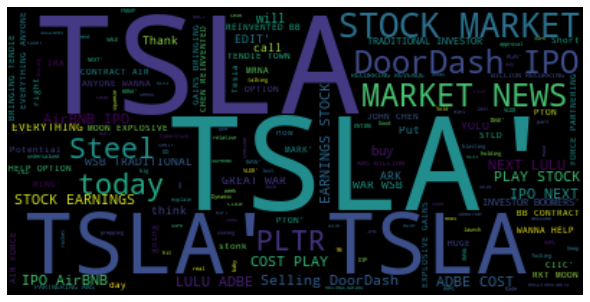

In [ ]:
!pip3 install wordcloud
!pip3 install matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Create a graphic wordcloud
text_for_wordcloud = str(ticker_name_find_in_comments)
cloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Highlight ticker symbols that were associated with positive VADER sentiment scores
VADER_scores_df.sort_values(by=['compound'], inplace=True, ascending=False)
VADER_scores_df.head()

#VADER_scores_df_12_05

,compound,positive,negative,neutral
Ticker_Present_In_Text,,,,
FLIR,0.87200,0.6090,0.0,0.3910
BNTX,0.67050,0.2560,0.0,0.7440
HUGE,0.64500,0.3455,0.0,0.6545
LMFA,0.64080,0.4140,0.0,0.5860
PLAY,0.61625,0.3205,0.0,0.6795


In [ ]:
#Highlight ticker symbols that were associated with positive VADER sentiment scores
VADER_scores_df.sort_values(by=['compound'], inplace=True, ascending=True)
VADER_scores_df.head()



,compound,positive,negative,neutral
Ticker_Present_In_Text,,,,
VTRS,-0.400300,0.000000,0.278000,0.722000
GLSI,-0.382500,0.000000,0.168500,0.831500
EDIT,-0.249500,0.037333,0.089000,0.873667
MSFT,-0.136600,0.000000,0.129500,0.870500
TSLA,-0.100572,0.036000,0.092222,0.871833


In [ ]:
#consolidate positives and negatives into two dataframes
December_10_long_df = VADER_scores_df.loc[VADER_scores_df['compound'] > 0 , :].copy()
December_10_long_df.head()

,compound,positive,negative,neutral
Ticker_Present_In_Text,,,,
INVE,0.0258,0.1365,0.130,0.7335
RADI,0.0516,0.2730,0.260,0.4670
OMER,0.0516,0.2730,0.260,0.4670
BOOM,0.0516,0.2730,0.260,0.4670
AAPL,0.0722,0.1125,0.108,0.7795


In [ ]:
December_10_long_df.to_csv('December_10_long_Portfolio_CSV', index=False)

In [ ]:
December_10_short_df = VADER_scores_df.loc[VADER_scores_df['compound'] < 0 , :].copy()
December_10_short_df.head()

,compound,positive,negative,neutral
Ticker_Present_In_Text,,,,
VTRS,-0.400300,0.000000,0.278000,0.722000
GLSI,-0.382500,0.000000,0.168500,0.831500
EDIT,-0.249500,0.037333,0.089000,0.873667
MSFT,-0.136600,0.000000,0.129500,0.870500
TSLA,-0.100572,0.036000,0.092222,0.871833


In [ ]:
December_10_short_df.to_csv('December_10_Short_Portfolio_CSV', index=False)

In [ ]:
#construct a portfolio of the long stocks on the given day (day 1 - Dec 3) and find the closing values of those stocks on Day 1 - google sheets?
December_3_long_df['NASDAQ_TICKERS']

In [ ]:
#construct a portfolio of the short stocks on the given day (day 1 - Dec 3)  and find the closing values of those stocks on Day 1 - google sheets?
December_3_short_df['NASDAQ_TICKERS']

# Closing Price

In [ ]:
!pip install quandl

In [ ]:
#Read csv
sentiments_final = pd.read_csv('final_sentiments_df').rename(columns={'Unnamed: 0': 'Tickers'})
import quandl
quandl.ApiConfig.api_key = '*****'


In [ ]:
results = []
for i, r in sentiments_final.iterrows():
    result = quandl.get('EOD/'+r["Tickers"], column_index = '11', start_date='2020-12-9', end_date='2020-12-10')
    result['% Change'] = result.pct_change()
    results.append(result)


In [ ]:
prices_12_9 = pd.concat(results).reset_index()
prices_12_9_drop = prices_12_9.dropna().reset_index()
prices_12_9_drop.head()

,index,Date,Adj_Close,% Change
0,1,2020-12-10,123.24,0.011989
1,3,2020-12-10,476.87,-0.014202
2,5,2020-12-10,3101.49,-0.000873
3,7,2020-12-10,105.45,0.184166
4,9,2020-12-10,7.65,0.053719


In [ ]:
Closing_price_df_final = pd.concat([sentiments_final, prices_12_9_drop], axis=1).drop(columns=['Date'])
Closing_price_df_final = Closing_price_df_final.drop(columns=['index'])
Closing_price_df_final

,Tickers,compound,positive,negative,neutral,relevance,count,sentiment.score,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger,Adj_Close,% Change
0,AAPL,0.072200,0.112500,0.108000,0.779500,0.546128,2.000000,-0.602751,0.171525,0.439065,0.049814,0.052794,0.111681,123.2400,0.011989
1,ADBE,0.482400,0.164000,0.000000,0.836000,0.639823,1.166667,0.000000,0.212993,0.094898,0.057330,0.039302,0.223516,476.8700,-0.014202
2,AMZN,0.340000,0.167000,0.000000,0.833000,0.224529,1.000000,-0.537981,0.053914,0.476586,0.019277,0.071651,0.008687,3101.4900,-0.000873
3,ARCT,0.000000,0.000000,0.000000,1.000000,0.310150,1.000000,0.000000,0.206383,0.336546,0.071158,0.127782,0.037889,105.4500,0.184166
4,BCRX,0.000000,0.000000,0.000000,1.000000,0.919533,2.000000,-0.722884,0.195383,0.103409,0.162576,0.072204,0.663831,7.6500,0.053719
5,BNTX,0.670500,0.256000,0.000000,0.744000,0.770836,2.000000,0.947225,0.110616,0.320067,0.226165,0.084933,0.024424,129.5400,0.054800
6,BOOM,0.051600,0.273000,0.260000,0.467000,0.880273,1.000000,0.000000,0.049295,0.753114,0.056520,0.022686,0.128504,47.8800,0.044503
7,CIIC,0.526700,0.298000,0.000000,0.702000,0.439451,1.500000,-0.549307,0.017528,0.472276,0.031524,0.055226,0.003794,31.3800,-0.016301
8,CIICW,0.526700,0.298000,0.000000,0.702000,0.767367,1.500000,-0.549307,0.073030,0.308451,0.055161,0.053277,0.040820,7.1000,-0.041835
9,COMM,0.000000,0.000000,0.000000,1.000000,0.937512,1.000000,0.000000,0.164433,0.533847,0.037019,0.074384,0.133037,13.1600,0.013087


### Model 1 - Deep Learning to predict closing price via WallStreetBets sentiment


In [ ]:
 # Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [ ]:
Closing_price_df_for_model = Closing_price_df_final.drop(columns=['Tickers'])
Closing_price_df_for_model.head()

,compound,positive,negative,neutral,relevance,count,sentiment.score,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger,Adj_Close,% Change
0,0.0722,0.1125,0.108,0.7795,0.546128,2.000000,-0.602751,0.171525,0.439065,0.049814,0.052794,0.111681,123.24,0.011989
1,0.4824,0.1640,0.000,0.8360,0.639823,1.166667,0.000000,0.212993,0.094898,0.057330,0.039302,0.223516,476.87,-0.014202
2,0.3400,0.1670,0.000,0.8330,0.224529,1.000000,-0.537981,0.053914,0.476586,0.019277,0.071651,0.008687,3101.49,-0.000873
3,0.0000,0.0000,0.000,1.0000,0.310150,1.000000,0.000000,0.206383,0.336546,0.071158,0.127782,0.037889,105.45,0.184166
4,0.0000,0.0000,0.000,1.0000,0.919533,2.000000,-0.722884,0.195383,0.103409,0.162576,0.072204,0.663831,7.65,0.053719


In [ ]:
 # Create the features (X) and target (y) sets
X = Closing_price_df_for_model.iloc[:, 0:13].values
y = Closing_price_df_for_model["% Change"].values

In [ ]:
X.shape

(51, 13)

In [ ]:
 # Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
# Define the model - shallow neural net
number_hidden_nodes = 9
number_input_features = 13

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [ ]:
 # Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.2, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 68ms/step - loss: 0.6404 - mse: 0.6404 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6154 - mse: 0.6154 - val_loss: 0.8026 - val_mse: 0.8026
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5941 - mse: 0.5941 - val_loss: 0.7797 - val_mse: 0.7797
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.7601 - val_mse: 0.7601
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7431 - val_mse: 0.7431
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.5385 - mse: 0.5385 - val_loss: 0.7285 - val_mse: 0.7285
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5233 - mse: 0.5233 - val_loss: 0.7153 - val_mse: 0.7153
Epoch 8/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5073 - mse: 0.5073 - 

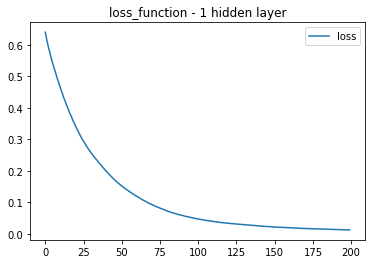

In [ ]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [ ]:
# Define the model - deep neural net
number_input_features = 13
hidden_nodes_layer1 = 18
hidden_nodes_layer2 = 6

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [ ]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 60ms/step - loss: 2.2716 - mse: 2.2716 - val_loss: 1.4342 - val_mse: 1.4342
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 2.1208 - mse: 2.1208 - val_loss: 1.3541 - val_mse: 1.3541
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 2.0094 - mse: 2.0094 - val_loss: 1.2771 - val_mse: 1.2771
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 1.8967 - mse: 1.8967 - val_loss: 1.2068 - val_mse: 1.2068
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 1.7927 - mse: 1.7927 - val_loss: 1.1426 - val_mse: 1.1426
Epoch 6/200
2/2 [==============================] - 0s 10ms/step - loss: 1.7001 - mse: 1.7001 - val_loss: 1.0826 - val_mse: 1.0826
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 1.6130 - mse: 1.6130 - val_loss: 1.0276 - val_mse: 1.0276
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 1.5296 - mse: 1.5296 - 

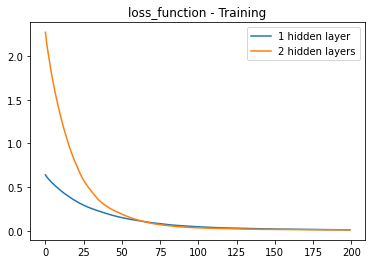

In [ ]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

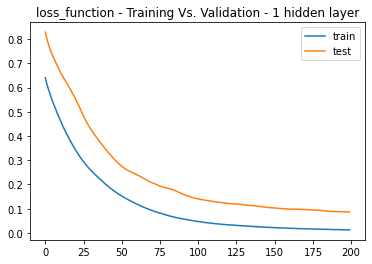

In [ ]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

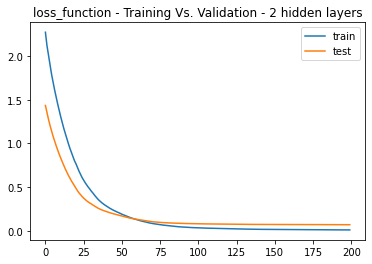

In [ ]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [ ]:
 # Save model as JSON
nn_json = nn.to_json()

file_path = Path("model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "model.h5"
nn.save_weights("model.h5")

In [ ]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = "model.h5"
loaded_model.load_weights(file_path)

In [ ]:
# Make some predictions with the loaded model
Closing_price_df_for_model["predicted"] = loaded_model.predict(X)
Closing_price_df_for_model.head(51)

,compound,positive,negative,neutral,relevance,count,sentiment.score,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger,Adj_Close,% Change,predicted
0,0.072200,0.112500,0.108000,0.779500,0.546128,2.000000,-0.602751,0.171525,0.439065,0.049814,0.052794,0.111681,123.2400,0.011989,-0.067727
1,0.482400,0.164000,0.000000,0.836000,0.639823,1.166667,0.000000,0.212993,0.094898,0.057330,0.039302,0.223516,476.8700,-0.014202,-0.032547
2,0.340000,0.167000,0.000000,0.833000,0.224529,1.000000,-0.537981,0.053914,0.476586,0.019277,0.071651,0.008687,3101.4900,-0.000873,0.004665
3,0.000000,0.000000,0.000000,1.000000,0.310150,1.000000,0.000000,0.206383,0.336546,0.071158,0.127782,0.037889,105.4500,0.184166,-0.067727
4,0.000000,0.000000,0.000000,1.000000,0.919533,2.000000,-0.722884,0.195383,0.103409,0.162576,0.072204,0.663831,7.6500,0.053719,0.289150
5,0.670500,0.256000,0.000000,0.744000,0.770836,2.000000,0.947225,0.110616,0.320067,0.226165,0.084933,0.024424,129.5400,0.054800,0.064706
6,0.051600,0.273000,0.260000,0.467000,0.880273,1.000000,0.000000,0.049295,0.753114,0.056520,0.022686,0.128504,47.8800,0.044503,0.046756
7,0.526700,0.298000,0.000000,0.702000,0.439451,1.500000,-0.549307,0.017528,0.472276,0.031524,0.055226,0.003794,31.3800,-0.016301,0.066752
8,0.526700,0.298000,0.000000,0.702000,0.767367,1.500000,-0.549307,0.073030,0.308451,0.055161,0.053277,0.040820,7.1000,-0.041835,-0.067727
9,0.000000,0.000000,0.000000,1.000000,0.937512,1.000000,0.000000,0.164433,0.533847,0.037019,0.074384,0.133037,13.1600,0.013087,0.000664


In [ ]:
!pip install mpl_finance
import matplotlib.pyplot as plt
import pandas as pd

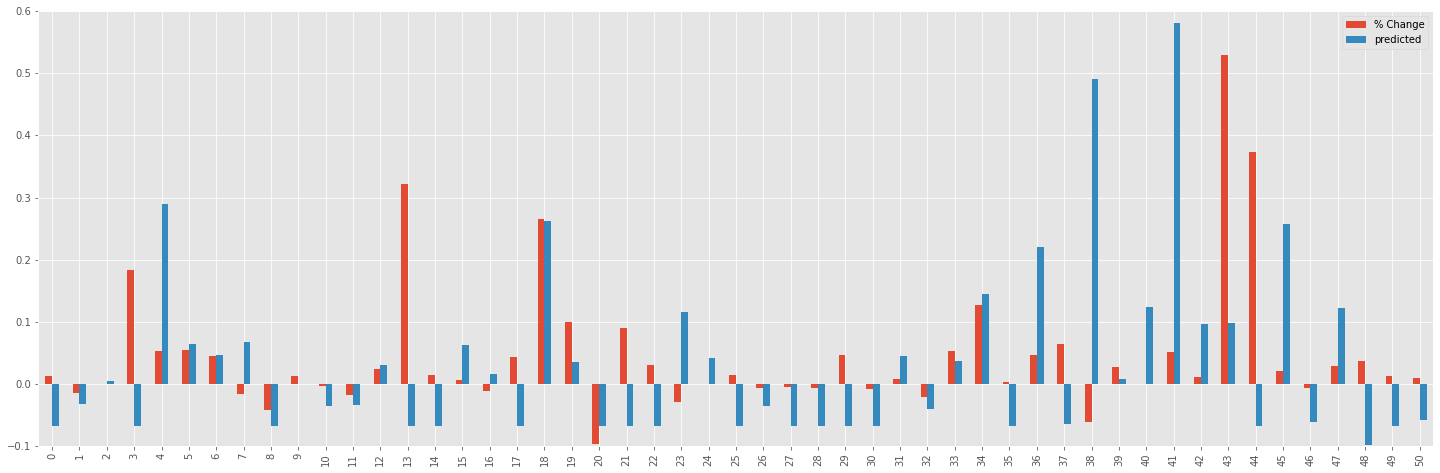

In [ ]:
Closing_price_df_for_graph = Closing_price_df_for_model.drop(columns=['compound',	'positive',	'negative',	'neutral',	'relevance',	'count',	'sentiment.score',	'emotion.sadness',	'emotion.joy',	'emotion.fear',	'emotion.disgust',	'emotion.anger',	'Adj_Close'])

Closing_price_df_for_graph.plot(kind = 'bar', figsize = [25,8],  ylim = [-0.1,0.6])

In [ ]:
  # Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model.predict(X)
 
 # Evaluate the model with the MSE metric
print(f"The Mean Squared Error of our model is: {mean_squared_error(y, y_pred)}")

The Mean Squared Error of our model is: 0.030231968808223143


# IBM Watson Sentiment - Stock Price Prediction

In [ ]:
sadness=Closing_price_df_final['emotion.sadness'].max()
joy=Closing_price_df_final['emotion.joy'].max()
fear=Closing_price_df_final['emotion.fear'].max()
disgust=Closing_price_df_final['emotion.disgust'].max()
anger=Closing_price_df_final['emotion.anger'].max()

NameError: ignored

In [ ]:
sadness_stocks_df=Closing_price_df_final.loc[Closing_price_df_final['emotion.sadness']== sadness]
joy_stocks_df=Closing_price_df_final.loc[Closing_price_df_final['emotion.joy']== joy]
fear_stocks_df=Closing_price_df_final.loc[Closing_price_df_final['emotion.fear']== fear]
disgust_stocks_df=Closing_price_df_final.loc[Closing_price_df_final['emotion.disgust']== disgust]
anger_stocks_df=Closing_price_df_final.loc[Closing_price_df_final['emotion.anger']== anger]

In [ ]:
import alpaca_trade_api as tradeapi
import os
import pandas as pd

In [ ]:
alpaca_api_key = "PK7HMY0NMZGCCGKY1DGZR"
alpaca_secret_key = "HnKDzBGE0oDUzRIKhmaBr59KMv0haa69EPnGgOI8"

In [ ]:
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")
timeframe = "1D"
start_date = pd.Timestamp("2017-12-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-09", tz="America/New_York").isoformat()

In [ ]:
def stock_details(tickers):
    df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df
    #df_stocks = pd.DataFrame(df_tickers)    
    return df_ticker

# Sadness Stock

In [ ]:
sadness_stocks_df.head()

In [ ]:
stock_code=sadness_stocks_df.iloc[0]
tickers=stock_code[0]
tickers

In [ ]:
sadness_ticker = pd.DataFrame(stock_details(tickers))

In [ ]:
sadness_ticker.head()

In [ ]:
sadness_ticker.index=sadness_ticker.index.date
sadness_ticker=sadness_ticker.droplevel(axis=1,level=0)
sadness_ticker.head()

# Joy Stock

In [ ]:
joy_stocks_df.head()

In [ ]:
stock_code=joy_stocks_df.iloc[0]
tickers=stock_code[0]
tickers

In [ ]:
joy_ticker = pd.DataFrame(stock_details(tickers))

In [ ]:
joy_ticker.head()

In [ ]:
joy_ticker.index=joy_ticker.index.date
joy_ticker=joy_ticker.droplevel(axis=1,level=0)
joy_ticker.head()

# Fear Stock

In [ ]:
fear_stocks_df.head()

In [ ]:
stock_code=fear_stocks_df.iloc[0]
tickers=stock_code[0]
tickers

In [ ]:
fear_ticker = pd.DataFrame(stock_details(tickers))

In [ ]:
fear_ticker.head()

In [ ]:
fear_ticker.index=fear_ticker.index.date
fear_ticker=fear_ticker.droplevel(axis=1,level=0)
fear_ticker.head()

# Disgust Stock

In [ ]:
disgust_stocks_df.head()

In [ ]:
stock_code=disgust_stocks_df.iloc[0]
tickers=stock_code[0]
tickers

In [ ]:
disgust_ticker.head()

In [ ]:
disgust_ticker.index=disgust_ticker.index.date
disgust_ticker=disgust_ticker.droplevel(axis=1,level=0)
disgust_ticker.head()

# Anger Stock

In [ ]:
anger_stocks_df.head()

In [ ]:
stock_code=anger_stocks_df.iloc[0]
tickers=stock_code[0]
tickers

In [ ]:
anger_ticker = pd.DataFrame(stock_details(tickers))

In [ ]:
anger_ticker.head()

In [ ]:
anger_ticker.index=anger_ticker.index.date
anger_ticker=anger_ticker.droplevel(axis=1,level=0)
anger_ticker.head()

## LSTM Stock Predictor Using Closing Prices - Disgust Stock

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [ ]:
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [ ]:
def window_data(disgust_ticker, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(disgust_ticker) - window):
        features = disgust_ticker.iloc[i : (i + window), feature_col_number]
        target = disgust_ticker.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 5

feature_column = 3
target_column = 3
X, y = window_data(disgust_ticker, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

In [ ]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test) 

In [ ]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}") 

In [ ]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [ ]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Summarize the model
model.summary()

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=1, verbose=1)

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

In [ ]:
# Make some predictions
predicted = model.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = disgust_ticker.index[-len(real_prices): ])
stocks.head() 

In [ ]:
# Plot the real vs predicted prices as a line chart
stocks.plot()